### **Taller 1 Análisis de Datos**

Paula Ubilla

p.ubillaf@udd.cl

Magíster en Data Science - Universidad del Desarrollo

### **Instrucciones**

Este taller es un conjunto de actividades para poner en práctica y consolidar los contenidos revisados en la primera unidad del curso, en las sesiones 1 y 2.


*   Puedes realizarlo individualmente o hasta en grupos de 3 personas.
*   La entrega es hasta el 15 de septiembre (para todo el crédito)
*   Debes entregar un notebook en el que desarrolle las preguntas y no olvide concluir sus respuestas.
*   Será evaluado mediante la rúbrica de evaluación disponible.

__________________________________

### **Pregunta 1 - Bajando y formateando datos del Banco Mundial**

Replique el ejemplo práctico de importar datos desde la API del Banco Mundial y empezar la base para su análisis de series de tiempo.

Importe usted la serie de GDP total Y Percapita para otro país serie desde la API del Banco mundial, muestre sus principales características y realice un grafico.

¿Pareciera haber tendencias? Explique.

In [1]:
pip install --upgrade pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

In [3]:
#Paso 1: Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import random
import seaborn as sns

from datetime import date, timedelta
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import f_oneway


In [4]:
#Paso 2: Revisar la data para obtener datos desde la API del Banco Mundial
from pandas_datareader import data, wb
wb.search('gdp')

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
689,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
690,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
1503,BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"b'International Monetary Fund, Balance of Paym...",Economy & Growth ; Private Sector ; Trade
...,...,...,...,...,...,...,...
16707,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16708,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
16709,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16710,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [5]:
import yfinance as yf

df = yf.download("AAPL", start="2020-01-01", end="2022-01-01")
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.249023  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.536888  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.114883  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.771027  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.941650  132079200


In [6]:
gdp_data = pdr.wb.download(indicator='NY.GDP.MKTP.CD', country=['US', 'CA'], start=2010, end=2020)
print(gdp_data.head())


              NY.GDP.MKTP.CD
country year                
Canada  2020    1.647598e+12
        2019    1.743725e+12
        2018    1.725298e+12
        2017    1.649266e+12
        2016    1.527995e+12


In [7]:
#Paso 3: ver los datos de Austria
gdp_data_austria = pdr.wb.download(indicator='NY.GDP.MKTP.CD', country=['AT'], start=2010, end=2020)

print(gdp_data_austria)

              NY.GDP.MKTP.CD
country year                
Austria 2020    4.352252e+11
        2019    4.446212e+11
        2018    4.549912e+11
        2017    4.172612e+11
        2016    3.958374e+11
        2015    3.819711e+11
        2014    4.425848e+11
        2013    4.301910e+11
        2012    4.094018e+11
        2011    4.316852e+11
        2010    3.922751e+11


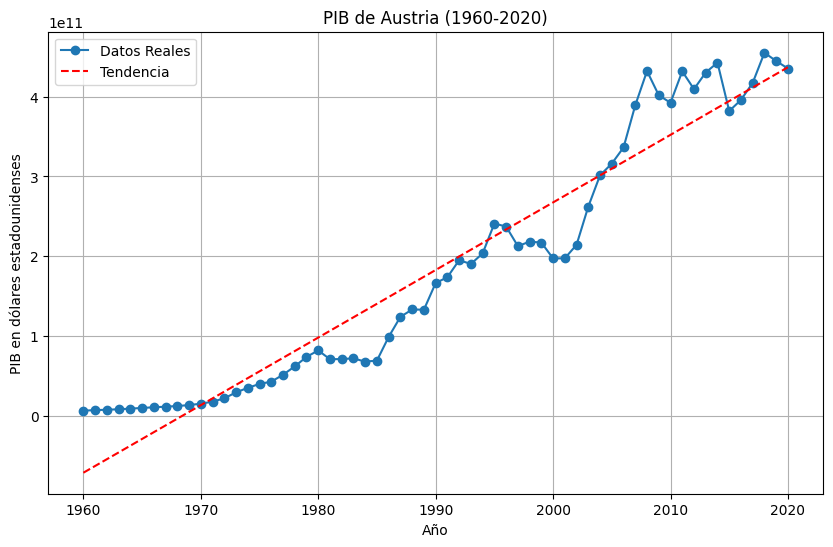

In [8]:
gdp_data_austria = pdr.wb.download(indicator='NY.GDP.MKTP.CD', country=['AT'], start=1960, end=2020)
gdp_data_austria.reset_index(inplace=True)
gdp_data_austria['year'] = gdp_data_austria['year'].astype(int)
gdp_data_austria.sort_values('year', inplace=True)
z = np.polyfit(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], marker='o', label='Datos Reales')
plt.plot(gdp_data_austria['year'], p(gdp_data_austria['year']), 'r--', label='Tendencia')
plt.title('PIB de Austria (1960-2020)')
plt.xlabel('Año')
plt.ylabel('PIB en dólares estadounidenses')
plt.legend()
plt.grid(True)
plt.show()

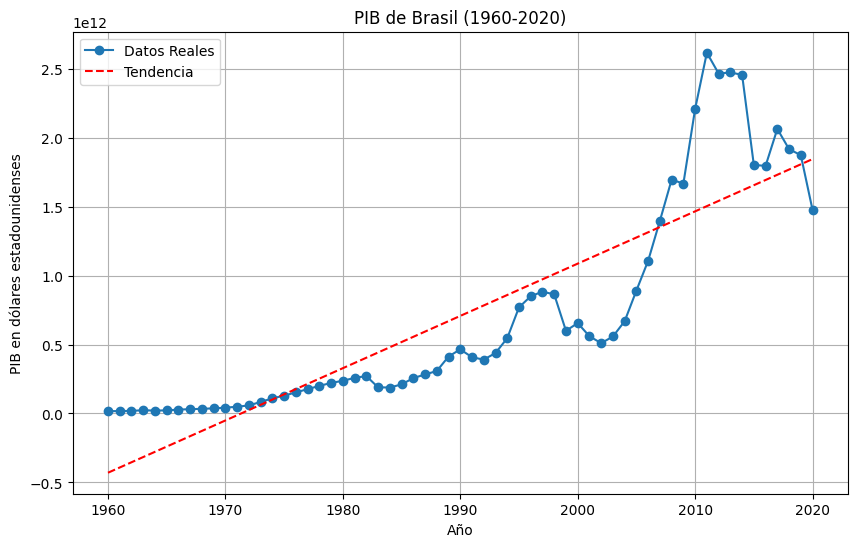

In [9]:
gdp_data_austria = pdr.wb.download(indicator='NY.GDP.MKTP.CD', country=['BR'], start=1960, end=2020)
gdp_data_austria.reset_index(inplace=True)
gdp_data_austria['year'] = gdp_data_austria['year'].astype(int)
gdp_data_austria.sort_values('year', inplace=True)
z = np.polyfit(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], marker='o', label='Datos Reales')
plt.plot(gdp_data_austria['year'], p(gdp_data_austria['year']), 'r--', label='Tendencia')
plt.title('PIB de Brasil (1960-2020)')
plt.xlabel('Año')
plt.ylabel('PIB en dólares estadounidenses')
plt.legend()
plt.grid(True)
plt.show()

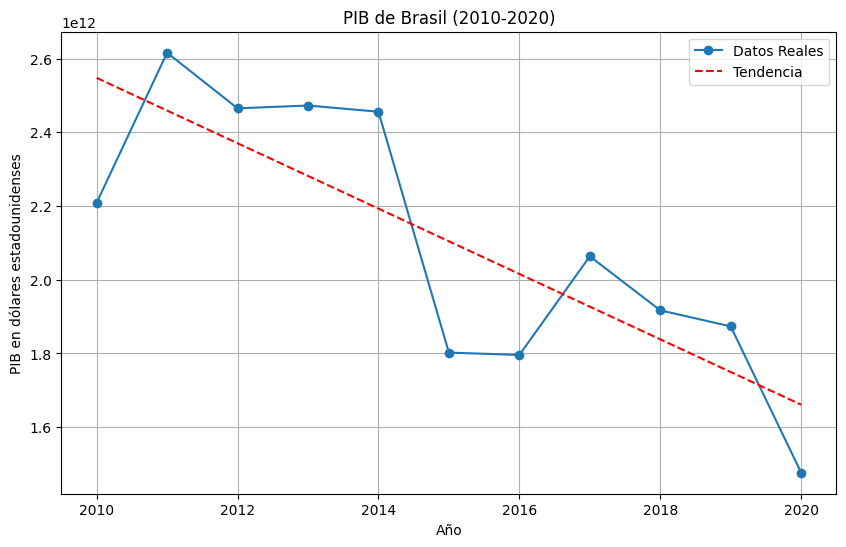

In [10]:
gdp_data_austria = pdr.wb.download(indicator='NY.GDP.MKTP.CD', country=['BR'], start=2010, end=2020)
gdp_data_austria.reset_index(inplace=True)
gdp_data_austria['year'] = gdp_data_austria['year'].astype(int)
gdp_data_austria.sort_values('year', inplace=True)
z = np.polyfit(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(gdp_data_austria['year'], gdp_data_austria['NY.GDP.MKTP.CD'], marker='o', label='Datos Reales')
plt.plot(gdp_data_austria['year'], p(gdp_data_austria['year']), 'r--', label='Tendencia')
plt.title('PIB de Brasil (2010-2020)')
plt.xlabel('Año')
plt.ylabel('PIB en dólares estadounidenses')
plt.legend()
plt.grid(True)
plt.show()

**RESPUESTA** En el caso revisado por el grupo se eligió Brasil

Se observa que en genral, desde 1960 el PIB va en aumento, sin embargo al observar sólo los últimos 10 años se observa que la tendencia es a la baja|

__________________________

### **Pregunta 2 - Investigando sobre países:**

Considere que tenemos los datos del banco mundial, del país que seleccionó anteriormente, y desea aprender sobre alguna característica de dicho país en el periodo.
\

Escriba una pregunta de investigación que se pueda responder con los datos disponibles. ¿Cómo definiria la variable aleatoria relevante? ¿Qué hipótesis podria responder su pregunta?

**Respuesta**

La pregúnta 
>*"¿Cómo ha afectado la pandemia de COVID-19 al PIB de Austria en comparación con la tendencia económica de la década?"*

Definición de la variable aleatoria relevante:
>*"Cambio Anual en el PIB de Austria"*

Hipótesis que podría responder la pregunta
>*"La pandemia de COVID-19 no tuvo un efecto significativo en el cambio anual del PIB de Austria para el año 2020 en comparación con los años anteriores."*



In [94]:
data = {
    'year': list(range(2010, 2021)),
    'NY.GDP.MKTP.CD': [
        3.922751e+11, 4.316852e+11, 4.094018e+11, 4.301910e+11,
        4.425848e+11, 3.819711e+11, 3.958374e+11, 4.172612e+11,
        4.549912e+11, 4.446212e+11, 4.352252e+11
    ]
}

gdp_data_austria = pd.DataFrame(data)
gdp_data_austria['change'] = gdp_data_austria['NY.GDP.MKTP.CD'].pct_change() * 100
change_data = gdp_data_austria['change'].dropna()
change_pre_2020 = change_data[gdp_data_austria['year'] < 2020]
change_2020 = change_data[gdp_data_austria['year'] == 2020]
t_stat, p_value = ttest_1samp(change_pre_2020, np.float64(change_2020))
alpha = 0.05 

if p_value < alpha:
    print("\033[1;34mRechazo la hipótesis nula, hay un cambio significativo en 2020.\033[0m")
else:
    print("\033[1;34mNo rechazo la hipótesis nula, no hay un cambio significativo en 2020.\033[0m")


No rechazo la hipótesis nula, no hay un cambio significativo en 2020.


____________________________________________________

### **Pregunta 3 - Caso aplicación: Ejemplo AB test en Marketing**

**Enunciado**
Imaginemos que trabajamos en una empresa de e-commerce que vende productos electrónicos y queremos aumentar las ventas en una línea de productos específica, como teléfonos móviles.

Para ello, decidimos utilizar una promoción de ventas basada en una ruleta lúdica que ofrecerá descuentos a los clientes que la utilicen.

Para implementar la promoción, primero seleccionamos aleatoriamente un grupo de clientes y les enviamos un correo electrónico con un enlace a la ruleta lúdica. Al hacer clic en el enlace, los clientes son redirigidos a una página en la que pueden girar la ruleta y ganar un descuento en su próxima compra.

Vamos a pensar que los clientes son asignados a uno de los siguientes grupos: - Control: no les da una promoción (mala suerte, intentalo otra vez) - Tratamiento 1: 20% de descuento en el producto - Tratamiento 2: Un complemento gratuito (carcasa) que tiene un costo para la empresa similar al descuento.

Creación de los datos
Como nuestro caso es un ejemplo ficticio, vamos a crear los datos.

Este código creará un conjunto de datos con 400 observaciones (200 en el grupo de control y 200 en el grupo de tratamiento), donde se simulan lascompras de cada usuario.

In [95]:
# Define una semilla para la generación de números aleatorios
np.random.seed(123)
random.seed(123)

# Crear un vector de 200 valores aleatorios para el grupo de control
control = np.random.choice(["Control"], size=200, replace=True)

# Crear un vector de 200 valores aleatorios para el grupo de tratamiento
tratamiento = np.random.choice(["Treatment 1", "Treatment 2"], size=100, replace=True, p=[0.7, 0.3])

# Crear un vector de número de compras para cada grupo
control_compras = np.random.binomial(5, 0.2, size=200)
tratamiento1_compras = np.random.binomial(5, 0.4, size=100)
tratamiento2_compras = np.random.binomial(5, 0.6, size=100)

# Combinar los vectores en un DataFrame
data = {
    'grupo': np.concatenate((control, np.repeat("Treatment", 200))),
    'tipo_tratamiento': np.concatenate((np.repeat("Control", 200), np.repeat(["Treatment 1", "Treatment 2"], [100, 100]))),
    'ventas': np.concatenate((control_compras, tratamiento1_compras, tratamiento2_compras))
}

ventas_df = pd.DataFrame(data)

# Verificar el DataFrame
ventas_df.head(5)

,grupo,tipo_tratamiento,ventas
0,Control,Control,1
1,Control,Control,1
2,Control,Control,0
3,Control,Control,0
4,Control,Control,0


In [96]:
ventas_df.tail()

,grupo,tipo_tratamiento,ventas
395,Treatment,Treatment 2,1
396,Treatment,Treatment 2,2
397,Treatment,Treatment 2,1
398,Treatment,Treatment 2,3
399,Treatment,Treatment 2,2


Describa los resultados de la promoción para los diferentes grupos en términos de estadísticas descriptivas:

**Preguntas:**
Estudiemos si la promoción fue efectiva en estos datos. Para esto:

#### 1. Describa los resultados de la promocion para los diferentes grupos, en terminos de estadisticas descriptivas.


In [97]:
ventas_df.groupby('grupo')['ventas'].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
Control,200.0,1.005,0.910561,0.0,0.0,1.0,2.0,4.0
Treatment,200.0,2.505,1.244071,0.0,2.0,2.0,3.0,5.0


Con lo anterior se puede observar que:

**Promedio**
\
    Control = 1.005
    \
    Tratamiento = 2.505
    
\
**Desviación Estándar**
\
    Control = 0.91
    \
    Tratamiento = 1.24

#### 2. Compare visualmente los resultados de los diferentes grupos:

##### Boxplot

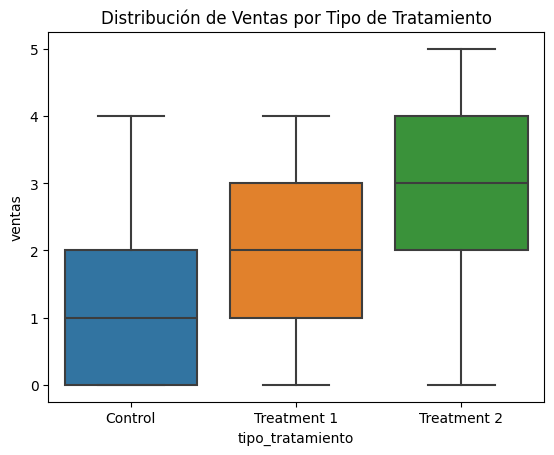

In [98]:

sns.boxplot(x='tipo_tratamiento', y='ventas', data=ventas_df)
plt.title('Distribución de Ventas por Tipo de Tratamiento')
plt.show()


##### Distribución

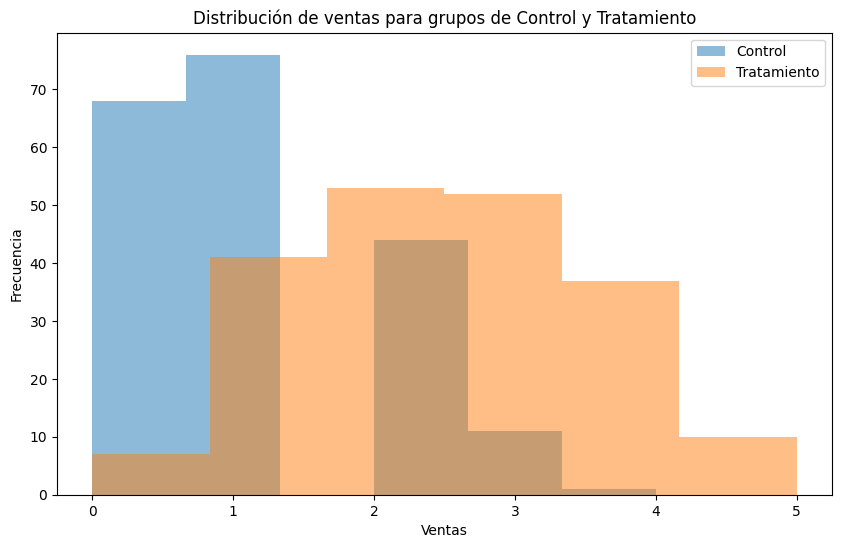

In [99]:
plt.figure(figsize=(10, 6))
plt.hist(ventas_df[ventas_df['grupo'] == 'Control']['ventas'], alpha=0.5, label='Control', bins=6)
plt.hist(ventas_df[ventas_df['grupo'] == 'Treatment']['ventas'], alpha=0.5, label='Tratamiento', bins=6)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Distribución de ventas para grupos de Control y Tratamiento')
plt.show()


**Hipótesis nula (H0): No hay diferencia significativa en las ventas entre el grupo de Control y el grupo de Tratamiento.**

\
**Hipótesis alternativa (H1): Existe una diferencia significativa en las ventas entre el grupo de Control y el grupo de Tratamiento.**

#### 3. ¿Fue la promoción efectiva? Use una prueba de hipótesis para analizar el grupo tratado y de control:

In [100]:
control_ventas = ventas_df[ventas_df['grupo'] == 'Control']['ventas']
tratamiento_ventas = ventas_df[ventas_df['grupo'] == 'Treatment']['ventas']

t_statistic, p_value = stats.ttest_ind(control_ventas, tratamiento_ventas)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("\033[1;34mRechazo la hipótesis nula: Hay evidencia de una diferencia significativa en las ventas.\033[0m")
else:
    print("\033[1;34mNo se puede rechazar la hipótesis nula: No hay evidencia de una diferencia significativa en las ventas.\033[0m")

Estadística t: -13.759631896434163
Valor p: 1.6400407545693855e-35
Rechazo la hipótesis nula: Hay evidencia de una diferencia significativa en las ventas.


#### 4. ¿Cuál de las promociones fue más efectiva? Use una prueba ANOVA:

In [101]:
grupo_control = ventas_df[ventas_df['grupo'] == 'Control']['ventas']
grupo_tratamiento1 = ventas_df[ventas_df['tipo_tratamiento'] == 'Treatment 1']['ventas']
grupo_tratamiento2 = ventas_df[ventas_df['tipo_tratamiento'] == 'Treatment 2']['ventas']

f_statistic, p_value_anova = f_oneway(grupo_control, grupo_tratamiento1, grupo_tratamiento2)
print("Estadística F:", f_statistic)
print("Valor p (ANOVA):", p_value_anova)

alpha = 0.05 
if p_value_anova < alpha:
    print("\033[1;34mRechazo la hipótesis nula: Hay evidencia de diferencias significativas entre al menos dos grupos.\033[0m")
else:
    print("\033[1;34mNo puedo rechazar la hipótesis nula: No hay evidencia de diferencias significativas entre los grupos.\033[0m")


Estadística F: 136.50009671530648
Valor p (ANOVA): 7.656712991602311e-46
Rechazo la hipótesis nula: Hay evidencia de diferencias significativas entre al menos dos grupos.


No se puede concluir así que hay diferencias significativas entre los grupos en términos de ventas.

__________________

### **Pregunta4 - Caso de aplicación datos de educación**

#### **Pregunta de investigación**

Nuestro objetivo es responder la siguiente pregunta ficticia de investigación:

***Asistir a cursos de verano mejora los resultados académicos?***

Para responder esta pregunta, usaremos unos datos ficticios y simulados

#### **Contexto**
La pregunta de investigación se inspira en trabajos como el de Matsudaira (2007) e intervenciones en estudiantes de bajo nivel socioeconómico por Dietrichson et al ( 2017).

El escenario ficticio es el siguiente:
* Para un conjunto de colegios en una comuna, existe la opción de asistir a un curso de verano intensivo durante el verano entre 5 y 6to básico.
* El curso de verano se enfoca en mejorar las habilidades académicas de preparar la prueba de admisión a la universidad vigente (PSU en ese momento)
* El curso de verano es gratuito, pero para ser matriculados requiere que los padres se involucren en un proceso.
* Estamos interesados en testear el impacto de la participación en el curso en los resultados académicos de los estudiantes.

#### **Datos ficticios dispobibles**
Los datos estan disponibles en https://github.com/melanieoyarzun/web_analisisdatos_IDS_S223/tree/main/data

1. school_data_1.csv
* Usamos esta data para ejemplificar como cargar data guardada en formato csv.
* Este dataset tiene información sobre cada individuo (con identificador id), la escuela a la que asiste, un indicador si participó en el curso de verano, sexo, ingreso del hogar (en logaritmo), educación de los padres, resultados en una prueba estandarizada que se realiza a nivel de la comuna tanto para el año 5 como para el año 6.

2. school_data_2.dta
* Usamos esta data para ejemplificar como cargar data guardada en formato STATA.* Este dataset tiene información de cada individuo (con identificador id).
* Este dataset tiene la información si el individuo recibió la carta de invitación para participar del curso de verano.

3. school_data_3.xlsx
* Usamos este dataset para practicar como cargar datos guardados en formato Microsoft Excel.
* Este dataset incluye datos sobre cada individuo (con identificador id)
Este dataset tiene información de rendimiento académico antes y después del curso de verano.

#### **Objetivos:**
La idea de este taller es poner en práctica los primeros pasos para un análisis:

1. Este proceso generalmente incluye cargarlos, inspeccionarlos, limpiar y dar la estructura deseada.
2. También exploraremos los datos, usaremos estadísticas descriptivas que nos den una idea y resolver problemas potenciales (missing, ouliers, etc) antes de estimar cualquier modelo.

En la vida real, este proceso suele ser bastante largo, laborioso e implica volver sobre los pasos anteriores múltiples veces. También invlocura tomar desiciones por parte de los investigadores, por lo cual la documentación de esta fase es especialmente importante.

En nuestro caso, será bastante lineal y directo, ya que son datos ficticios simulados. Pero en la realidad, no suele ser así.

#### I. Cargar Librerías

In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### II. Cargar Archivos e Inspeccionar Archivos

In [103]:
df_csv = pd.read_csv("G:\Mi unidad\Colab Notebooks\Análisis de Datos\school_data_1.csv")
df_csv.head()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
0,1,5,0,1,10.0,12.939209,NaN,1.636284
1,2,14,1,0,11.0,14.737391,1.297036,2.561449
2,3,7,1,0,14.0,16.083261,2.761908,3.526002
3,4,8,0,0,12.0,14.608081,1.772913,2.381062
4,5,9,1,0,11.0,13.756785,1.180356,1.959818


In [104]:
df_dta = pd.read_stata('G:\Mi unidad\Colab Notebooks\Análisis de Datos\school_data_2.dta')
df_dta.head()

,person_id,letter
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [105]:
df_xls = pd.read_excel('G:\Mi unidad\Colab Notebooks\Análisis de Datos\school_data_3.xlsx')
df_xls.head()

,person_id,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id
0,1,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9


In [106]:
print(df_csv.describe)
print("\033[1;34m______________________________________________________________________________________________________________________________\033[0m")


<bound method NDFrame.describe of       person_id  school_id  summercamp  female  parental_schooling  \
0             1          5           0       1                10.0   
1             2         14           1       0                11.0   
2             3          7           1       0                14.0   
3             4          8           0       0                12.0   
4             5          9           1       0                11.0   
...         ...        ...         ...     ...                 ...   
3486       3487          7           0       1                11.0   
3487       3488          2           1       0                12.0   
3488       3489         17           0       1                12.0   
3489       3490         19           0       0                16.0   
3490       3491         30           0       0                10.0   

      parental_lincome  test_year_5  test_year_6  
0            12.939209          NaN     1.636284  
1            14.737391 

In [107]:
df_csv.describe()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
count,3491.000000,3491.000000,3491.000000,3491.000000,3486.000000,3491.000000,3485.000000,3486.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411
std,1007.909222,8.674339,0.498379,0.499837,1.104628,0.693530,0.684667,0.720642
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.799708,2.007090
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258287,2.449218
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715426,3.018490
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078


In [108]:
print(df_dta.describe)
print()
print("\033[1;34m______________________________________________________________________________________________________________________________\033[0m")
print()
print(df_xls.describe)
print("\033[1;34m______________________________________________________________________________________________________________________________\033[0m")

<bound method NDFrame.describe of       person_id  letter
0             1     0.0
1             2     0.0
2             3     0.0
3             4     0.0
4             5     0.0
...         ...     ...
3486       3487     0.0
3487       3488     1.0
3488       3489     0.0
3489       3490     0.0
3490       3491     0.0

[3491 rows x 2 columns]>

______________________________________________________________________________________________________________________________

<bound method NDFrame.describe of       person_id  test_year_2  test_year_3  test_year_4  test_year_7  \
0             1     1.090117     1.914594     2.065805     2.377697   
1             2     1.246309     1.154470     1.582455     1.747376   
2             3     2.726472     2.269011     3.247252     3.017764   
3             4     2.693032     2.413203     1.479452     2.637954   
4             5     1.660545     1.828067     1.361972     1.904636   
...         ...          ...          ...          ...         

In [109]:
df_dta.describe()

,person_id,letter
count,3491.000000,3491.000000
mean,1746.000000,0.246921
std,1007.909222,0.431282
min,1.000000,0.000000
25%,873.500000,0.000000
50%,1746.000000,0.000000
75%,2618.500000,0.000000
max,3491.000000,1.000000


In [110]:
df_xls.describe()

,person_id,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569,15.655686
std,1007.909222,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010,8.674339
min,1.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084,1.000000
25%,873.500000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964,8.000000
50%,1746.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026,15.000000
75%,2618.500000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777,23.000000
max,3491.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796,30.000000


#### III. Pasos que debe realizar:

##### 1. Preparación inicial de los datos



> Tenemos 3 bases de datos con información diferente de los mismos individuos. Generalmente es buena idea tener una sola gran tabla con toda esta información, especialmente si estimaremos modelos en base a ésta.
>
> La base de datos 1 y 2 tienen una forma similar: los individuos son filas y las variables columnas y hay una sola fila para cada individuo. Empiece uniendo ambos.
>
> Notemos que el dataset unido debería tener 3491 filas y 9 columnas. Unimos todas las filas y agregamos al dataset de información del estudiante si recibió o no la carta (school_data_2)
>
>Entonces, siga el siguiente flujo de trabajo:
> Unimos school_data_1 y school_data_2 usando como variable de unión person_id y guardamos el dataset unido como school_data.
Unimos school_data_3 con school_data y sobre-escribimos school_data.
>
>Notar que acá unimos por las columnas person_id y school_id. Esto no es realmente necesario porque cada estudiante con id única tiene un solo colegio, pero sirve de ejemplo en como usar más de una columna mediante.
>
>Usamos la función summary() para obtener una estadística descriptiva de las variables en el dataset unido.

In [111]:
school_data = pd.merge(df_csv, df_dta, on='person_id', how='inner')
#print(f"Dimensiones de school_data después de la primera unión: {school_data.shape}")

school_data = pd.merge(school_data, df_xls, on=['person_id', 'school_id'], how='inner')
#print(f"Dimensiones de school_data después de la segunda unión: {school_data.shape}")

print(school_data.describe())


         person_id    school_id   summercamp       female  parental_schooling  \
count  3491.000000  3491.000000  3491.000000  3491.000000         3486.000000   
mean   1746.000000    15.655686     0.458894     0.515325           11.324727   
std    1007.909222     8.674339     0.498379     0.499837            1.104628   
min       1.000000     1.000000     0.000000     0.000000           10.000000   
25%     873.500000     8.000000     0.000000     0.000000           11.000000   
50%    1746.000000    15.000000     0.000000     1.000000           11.000000   
75%    2618.500000    23.000000     1.000000     1.000000           12.000000   
max    3491.000000    30.000000     1.000000     1.000000           23.000000   

       parental_lincome  test_year_5  test_year_6       letter  test_year_2  \
count       3491.000000  3485.000000  3486.000000  3491.000000  3491.000000   
mean          14.562807     2.258909     2.517411     0.246921     2.224587   
std            0.693530     0.684

In [112]:
school_data.head()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings
0,1,5,0,1,10.0,12.939209,NaN,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518


In [113]:
school_data.describe()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings
count,3491.000000,3491.000000,3491.000000,3491.000000,3486.000000,3491.000000,3485.000000,3486.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411,0.246921,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569
std,1007.909222,8.674339,0.498379,0.499837,1.104628,0.693530,0.684667,0.720642,0.431282,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411,0.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.799708,2.007090,0.000000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258287,2.449218,0.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715426,3.018490,0.000000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078,1.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796


##### 2. Limpieza de los datos

>*2.1 Tidyng los datos*
>
>Ahora que hemos unido las bases de datos, trataremos de que satisfazgan los principios de Tidy Data.
>
>Un data frame se considera “tidy” (Según Hadley) si se cumplen las siguientes condiciones:
>
>Cada columna (variable) contiene todas las medidas de la misma data/feature/caracteristica de las observaciones.
>Cada fila contiene medidas de la misma unidad de observación.
>(puedes profundizar y ver más ejemplos aplicados en https://sscc.wisc.edu/sscc/pubs/DWE/book/6-2-tidy-data.html )
>
>Uno de estos, es que cada columna debe ser una variable y cafa fila una unidad de observación.
>
>Si inspeccionamos el número de columnas: Son 17, pero tenemos 9 variables.
>
>Es porque tenemos puntajes de las pruebas del año 2 al 10. Este tipo de datos son de panel.
>
>Generalmente, que hacemos con este tipo de datos depende del tipo de modelos que queramos usar. Si bien el formato wide es facil de entender, generlamente para modelos y análisi preferimos que esté en formato long. Especialmente cuando modelamos incluyendo efectos fijos También es este el que adhiere a los principios tidy de mejor manera.
>
>Para cambiar a long, usamos pivot_longer.
>
>Ahora tenemos nuestros datos listos para que los inspeccionemos.

In [114]:
test_columns = [f"test_year_{i}" for i in range(2, 11)]
id_vars = [col for col in school_data.columns if col not in test_columns]
school_data_long = pd.melt(school_data, id_vars=id_vars, value_vars=test_columns,
                           var_name='test_year', value_name='test_score')
print(f"Dimensiones de school_data_long: {school_data_long.shape}")

Dimensiones de school_data_long: (31419, 10)


In [115]:
print(school_data_long.head())


   person_id  school_id  summercamp  female  parental_schooling  \
0          1          5           0       1                10.0   
1          2         14           1       0                11.0   
2          3          7           1       0                14.0   
3          4          8           0       0                12.0   
4          5          9           1       0                11.0   

   parental_lincome  letter  learnings    test_year  test_score  
0         12.939209     0.0  10.236394  test_year_2    1.090117  
1         14.737391     0.0   8.278911  test_year_2    1.246309  
2         16.083261     0.0   8.966529  test_year_2    2.726472  
3         14.608081     0.0   8.876466  test_year_2    2.693032  
4         13.756785     0.0   8.770518  test_year_2    1.660545  


In [116]:
school_data_long.head()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,letter,learnings,test_year,test_score
0,1,5,0,1,10.0,12.939209,0.0,10.236394,test_year_2,1.090117
1,2,14,1,0,11.0,14.737391,0.0,8.278911,test_year_2,1.246309
2,3,7,1,0,14.0,16.083261,0.0,8.966529,test_year_2,2.726472
3,4,8,0,0,12.0,14.608081,0.0,8.876466,test_year_2,2.693032
4,5,9,1,0,11.0,13.756785,0.0,8.770518,test_year_2,1.660545


In [117]:
print(school_data_long.describe())

          person_id     school_id    summercamp        female  \
count  31419.000000  31419.000000  31419.000000  31419.000000   
mean    1746.000000     15.655686      0.458894      0.515325   
std     1007.780891      8.673235      0.498315      0.499773   
min        1.000000      1.000000      0.000000      0.000000   
25%      873.000000      8.000000      0.000000      0.000000   
50%     1746.000000     15.000000      0.000000      1.000000   
75%     2619.000000     23.000000      1.000000      1.000000   
max     3491.000000     30.000000      1.000000      1.000000   

       parental_schooling  parental_lincome        letter     learnings  \
count        31374.000000      31419.000000  31419.000000  31419.000000   
mean            11.324727         14.562807      0.246921     10.063569   
std              1.104487          0.693442      0.431227      1.278847   
min             10.000000         12.667598      0.000000      5.386084   
25%             11.000000         14.11

In [118]:
school_data_long.describe()

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,letter,learnings,test_score
count,31419.000000,31419.000000,31419.000000,31419.000000,31374.000000,31419.000000,31419.000000,31419.000000,31408.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,0.246921,10.063569,2.367398
std,1007.780891,8.673235,0.498315,0.499773,1.104487,0.693442,0.431227,1.278847,0.719551
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,0.000000,5.386084,-0.570077
25%,873.000000,8.000000,0.000000,0.000000,11.000000,14.114416,0.000000,9.180917,1.882743
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,0.000000,10.041026,2.327884
75%,2619.000000,23.000000,1.000000,1.000000,12.000000,14.947058,0.000000,10.959234,2.839489
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,1.000000,14.620796,5.045062


>2.2 Selección de muestra
>
>Ya que contamos con datos que siguen los principios de tidy data, lo siguiente es seleccionar la muestra apropiada.
>
>En este trabajo, los unicos problemas que podríamos enfrentar son relacionados con valores faltantes o missing.
>
>Identifique cuantas filas y comunas son, los tipos de varables y número de missing values.
>
>En estos casos, para parental_schooling tenemos 45 missing y para test_score 11.
>
>Asumamos que estos valores missing son random y deseamos remover estas filas.

In [119]:
num_rows, num_columns = school_data_long.shape
print(f"El DataFrame tiene {num_rows} filas y {num_columns} columnas.")
print("Información de tipos de variables y valores no nulos:")
print(school_data_long.info())
missing_values = school_data_long.isna().sum()
print(f"Número de valores faltantes por columna:\n{missing_values}")

El DataFrame tiene 31419 filas y 10 columnas.
Información de tipos de variables y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31419 entries, 0 to 31418
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   person_id           31419 non-null  int64  
 1   school_id           31419 non-null  int64  
 2   summercamp          31419 non-null  int64  
 3   female              31419 non-null  int64  
 4   parental_schooling  31374 non-null  float64
 5   parental_lincome    31419 non-null  float64
 6   letter              31419 non-null  float64
 7   learnings           31419 non-null  float64
 8   test_year           31419 non-null  object 
 9   test_score          31408 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 2.4+ MB
None
Número de valores faltantes por columna:
person_id              0
school_id              0
summercamp             0
female              

>2.3 Modificar los datos
>
>Un último paso que haremos antes de hacer estadística decsriptiva es modificar los datos.
>
>Cambio de nombre columna Cambiaremos los nombres de algunas columnas para que se vean bien en la tablas. Vambos renombrar la variable summpercap a summer_school.
>
>Estandarizar puntajes En un siguiente paso, vamos a transformar los puntajes en la pruebas a una variable que tenga media 0 y desviación estándar 1. Es mejor trabajar con variables estandarizadas, ya que no requieren conocer el conexto específico de la medida y es más facil de comunicar y comparar.
>
>Ya estamos bien, ahora pasamos a conocer mejor nuestros datos con estadística descriptiva.

In [120]:
school_data_long = school_data_long.rename(columns={'summercamp': 'summer_school'})
school_data_long_clean = school_data_long.dropna(subset=['parental_schooling', 'test_score'])

In [121]:
school_data_long_clean.head()

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,letter,learnings,test_year,test_score
0,1,5,0,1,10.0,12.939209,0.0,10.236394,test_year_2,1.090117
1,2,14,1,0,11.0,14.737391,0.0,8.278911,test_year_2,1.246309
2,3,7,1,0,14.0,16.083261,0.0,8.966529,test_year_2,2.726472
3,4,8,0,0,12.0,14.608081,0.0,8.876466,test_year_2,2.693032
4,5,9,1,0,11.0,13.756785,0.0,8.770518,test_year_2,1.660545


In [122]:
school_data_long_clean = school_data_long_clean.copy()
# media y la desviación estándar
mean_score = school_data_long_clean['test_score'].mean()
std_score = school_data_long_clean['test_score'].std()

school_data_long_clean['test_score_standardized'] = (school_data_long_clean['test_score'] - mean_score) / std_score

print(school_data_long_clean.head())



   person_id  school_id  summer_school  female  parental_schooling  \
0          1          5              0       1                10.0   
1          2         14              1       0                11.0   
2          3          7              1       0                14.0   
3          4          8              0       0                12.0   
4          5          9              1       0                11.0   

   parental_lincome  letter  learnings    test_year  test_score  \
0         12.939209     0.0  10.236394  test_year_2    1.090117   
1         14.737391     0.0   8.278911  test_year_2    1.246309   
2         16.083261     0.0   8.966529  test_year_2    2.726472   
3         14.608081     0.0   8.876466  test_year_2    2.693032   
4         13.756785     0.0   8.770518  test_year_2    1.660545   

   test_score_standardized  
0                -1.774189  
1                -1.557213  
2                 0.498965  
3                 0.452512  
4                -0.981775  


In [123]:
print(f"Antes de la limpieza, el DataFrame tiene {school_data_long.shape[0]} filas.")
print('______________________________________________________________________________________________________')
missing_values_before = school_data_long[['parental_schooling', 'test_score']].isna().sum()
print(f"Número de valores faltantes antes de la limpieza:\n{missing_values_before}")
print('______________________________________________________________________________________________________')
school_data_long_clean = school_data_long.dropna(subset=['parental_schooling', 'test_score'])
print(f"Después de la limpieza, el DataFrame tiene {school_data_long_clean.shape[0]} filas.")
print('______________________________________________________________________________________________________')
# Calcular y mostrar el número de filas eliminadas
rows_removed = school_data_long.shape[0] - school_data_long_clean.shape[0]
print(f"Se han eliminado {rows_removed} filas.")
print('______________________________________________________________________________________________________')

Antes de la limpieza, el DataFrame tiene 31419 filas.
______________________________________________________________________________________________________
Número de valores faltantes antes de la limpieza:
parental_schooling    45
test_score            11
dtype: int64
______________________________________________________________________________________________________
Después de la limpieza, el DataFrame tiene 31363 filas.
______________________________________________________________________________________________________
Se han eliminado 56 filas.
______________________________________________________________________________________________________


In [124]:
print(school_data_long_clean.head())

   person_id  school_id  summer_school  female  parental_schooling  \
0          1          5              0       1                10.0   
1          2         14              1       0                11.0   
2          3          7              1       0                14.0   
3          4          8              0       0                12.0   
4          5          9              1       0                11.0   

   parental_lincome  letter  learnings    test_year  test_score  
0         12.939209     0.0  10.236394  test_year_2    1.090117  
1         14.737391     0.0   8.278911  test_year_2    1.246309  
2         16.083261     0.0   8.966529  test_year_2    2.726472  
3         14.608081     0.0   8.876466  test_year_2    2.693032  
4         13.756785     0.0   8.770518  test_year_2    1.660545  


In [125]:
school_data_long_clean.head()

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,letter,learnings,test_year,test_score
0,1,5,0,1,10.0,12.939209,0.0,10.236394,test_year_2,1.090117
1,2,14,1,0,11.0,14.737391,0.0,8.278911,test_year_2,1.246309
2,3,7,1,0,14.0,16.083261,0.0,8.966529,test_year_2,2.726472
3,4,8,0,0,12.0,14.608081,0.0,8.876466,test_year_2,2.693032
4,5,9,1,0,11.0,13.756785,0.0,8.770518,test_year_2,1.660545


##### 3. Estadística descriptiva

>Hasta ahora, cargamos datos en diversos formatos (csv, dta y xlsx) los unimos, re-estructuramos el dataset, removimos valores missing y generamos algunas transformaciones. El siguiente paso es empezar a conocer nuestros datos. Para esto haremos tablas de estadísticas descriptivas y también algunos graficos descriptivos.
>
>3.1 Tablas de etsádistocas descriptivas Incluya la media, la desviación estandar, la mediana, max y min, al menos.


In [126]:
columns_to_check = ['test_score', 'parental_schooling']
missing_columns = [col for col in columns_to_check if col not in school_data_long_clean.columns]
if missing_columns:
    print(f"Las siguientes columnas no existen en el DataFrame: {missing_columns}")
else:
    desc_stats = school_data_long_clean[columns_to_check].agg(['mean', 'std', 'median', 'max', 'min'])
    print("Tabla de estadísticas descriptivas:")
    print(desc_stats)

Tabla de estadísticas descriptivas:
        test_score  parental_schooling
mean      2.367286           11.324841
std       0.719861            1.104606
median    2.327711           11.000000
max       5.045062           23.000000
min      -0.570077           10.000000


>
>3.2 Gráficos de estadística descriptiva Realice al menos scatter plot, histograma, box plot y correalograma.

SCATTER PLOT

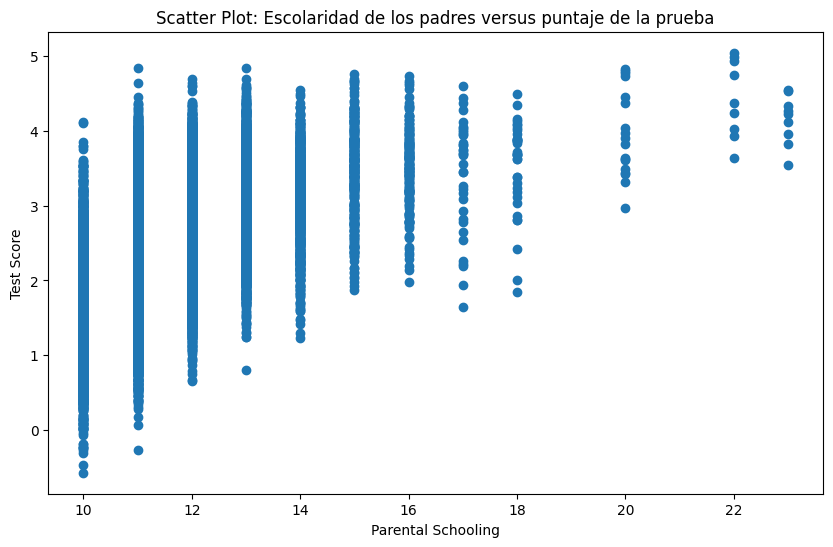

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(school_data_long_clean['parental_schooling'], school_data_long_clean['test_score'])
plt.title('Scatter Plot: Escolaridad de los padres versus puntaje de la prueba')
plt.xlabel('Parental Schooling')
plt.ylabel('Test Score')
plt.show()


HISTOGRAMA

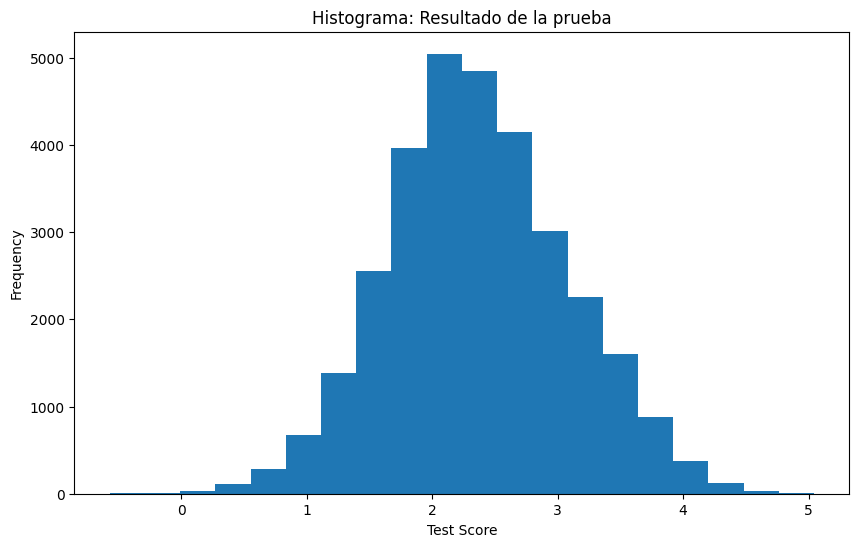

In [135]:
plt.figure(figsize=(10, 6))
plt.hist(school_data_long_clean['test_score'], bins=20)
plt.title('Histograma: Resultado de la prueba')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.show()

BOXPLOT

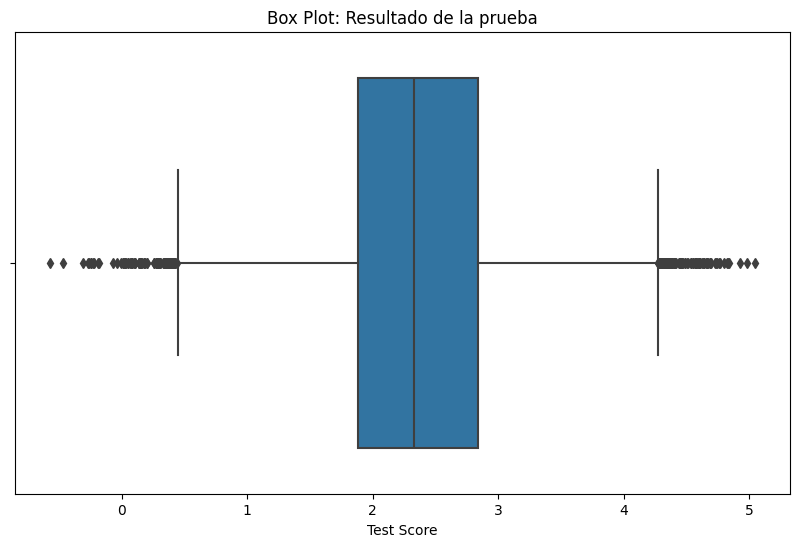

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=school_data_long_clean['test_score'])
plt.title('Box Plot: Resultado de la prueba')
plt.xlabel('Test Score')
plt.show()

CORRELOGRAMA

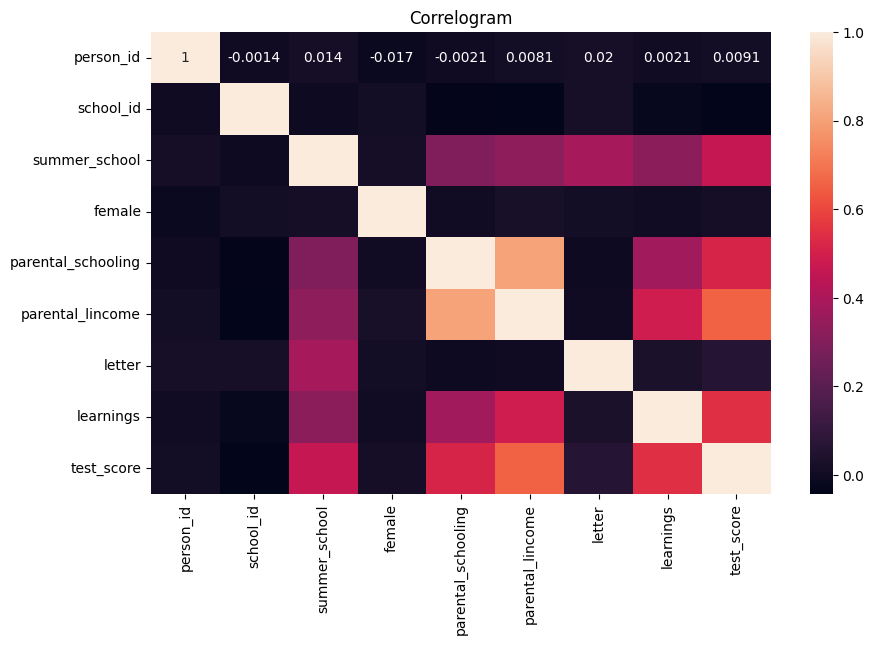

In [132]:
correlation_matrix = school_data_long_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlogram')
plt.show()